In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.style.use("ggplot")

In [2]:
import string

# Data understanding

In [3]:
df1 = pd.read_csv("data/result/final/train2.tsv", sep="\t")
df2 = pd.read_csv("data/result/final/test2.tsv", sep="\t")
df3 = pd.read_csv("data/result/final/val2.tsv", sep="\t")

In [4]:
df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)

In [5]:
df.head(2)

,json_id,label,statement,subject,speaker,job_title,state,party_affiliation,barely_true_counts,false_counts,...,sentiment,question,grammar_errors,ratio_of_capital_letters,curse,emotion,gibberish,offensiveness,political_bias,statement_length
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,...,negative,not_question,1,3.66,NaN,disgust,mild gibberish,non-offensive,CENTER,82
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,...,neutral,question,1,4.26,NaN,neutral,clean,non-offensive,RIGHT,141


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12836 entries, 0 to 12835
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   json_id                   12836 non-null  object 
 1   label                     12836 non-null  object 
 2   statement                 12836 non-null  object 
 3   subject                   12835 non-null  object 
 4   speaker                   12835 non-null  object 
 5   job_title                 9259 non-null   object 
 6   state                     10081 non-null  object 
 7   party_affiliation         12835 non-null  object 
 8   barely_true_counts        12835 non-null  float64
 9   false_counts              12835 non-null  float64
 10  half_true_counts          12835 non-null  float64
 11  mostly_true_counts        12835 non-null  float64
 12  pants_on_fire_counts      12835 non-null  float64
 13  context                   12706 non-null  object 
 14  justif

# Data preparation

In [7]:
df[["statement", "justification"]] = df[["statement", "justification"]].astype(str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12836 entries, 0 to 12835
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   json_id                   12836 non-null  object 
 1   label                     12836 non-null  object 
 2   statement                 12836 non-null  object 
 3   subject                   12835 non-null  object 
 4   speaker                   12835 non-null  object 
 5   job_title                 9259 non-null   object 
 6   state                     10081 non-null  object 
 7   party_affiliation         12835 non-null  object 
 8   barely_true_counts        12835 non-null  float64
 9   false_counts              12835 non-null  float64
 10  half_true_counts          12835 non-null  float64
 11  mostly_true_counts        12835 non-null  float64
 12  pants_on_fire_counts      12835 non-null  float64
 13  context                   12706 non-null  object 
 14  justif

## Add statement and justification length information

In [9]:
df["statement_len"] = df["statement"].apply(len)
df["justification_len"] = df["justification"].apply(len)

## Add word count

In [10]:
df["statement_wc"] = df["statement"].apply(lambda x: len(x.split(" ")))
df["justification_wc"] = df["justification"].apply(lambda x: len(x.split(" ")))

In [11]:
df = df.drop(["json_id"], axis=1)

In [12]:
df.head(2)

,label,statement,subject,speaker,job_title,state,party_affiliation,barely_true_counts,false_counts,half_true_counts,...,curse,emotion,gibberish,offensiveness,political_bias,statement_length,statement_len,justification_len,statement_wc,justification_wc
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,...,NaN,disgust,mild gibberish,non-offensive,CENTER,82,82,248,11,40
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,...,NaN,neutral,clean,non-offensive,RIGHT,141,141,637,24,105


## Add two-way label

In [13]:
df["bin_label"] = df["label"].apply(lambda x: "true" if x in ["half-true", "mostly-true", "true"] else "false")

## Label as a score

In [14]:
score = {
    "pants-fire": -3,
    "false": -2,
    "barely-true": -1,
    "half-true": 1,
    "mostly-true": 2,
    "true": 3
}
df["label_score"] = df["label"].apply(lambda x: score[x])

## Add punctuations count per 100 characters

In [15]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [16]:
df["punctuations"] = df["statement"].apply(lambda s: sum(map(s.count, string.punctuation)))

## How many null values

In [17]:
df.isna().sum()

label                           0
statement                       0
subject                         1
speaker                         1
job_title                    3577
state                        2755
party_affiliation               1
barely_true_counts              1
false_counts                    1
half_true_counts                1
mostly_true_counts              1
pants_on_fire_counts            1
context                       130
justification                   0
sentiment                       0
question                        0
grammar_errors                  0
ratio_of_capital_letters        0
curse                       12488
emotion                         0
gibberish                       0
offensiveness                   0
political_bias                  0
statement_length                0
statement_len                   0
justification_len               0
statement_wc                    0
justification_wc                0
bin_label                       0
label_score   

## Describe dataset

In [18]:
df.describe()

,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,grammar_errors,ratio_of_capital_letters,statement_length,statement_len,justification_len,statement_wc,justification_wc,label_score,punctuations
count,12835.000000,12835.000000,12835.000000,12835.000000,12835.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000
mean,11.596884,13.370861,17.220101,16.528243,6.246669,0.382518,3.686028,106.361016,106.361016,426.692350,17.925600,72.078140,0.271035,2.757557
std,18.997191,24.151612,35.911718,36.226809,16.163352,0.680626,2.684323,45.873297,45.873297,309.836223,7.858844,64.631191,2.007545,2.024538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,11.000000,3.000000,2.000000,1.000000,-3.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.890000,73.000000,73.000000,272.000000,12.000000,46.000000,-2.000000,1.000000
50%,2.000000,2.000000,3.000000,3.000000,1.000000,0.000000,3.170000,99.000000,99.000000,395.000000,17.000000,67.000000,1.000000,2.000000
75%,12.000000,15.000000,13.000000,12.000000,5.000000,1.000000,4.760000,133.000000,133.000000,537.000000,22.000000,90.000000,2.000000,4.000000
max,70.000000,114.000000,160.000000,163.000000,105.000000,13.000000,82.140000,1109.000000,1109.000000,9394.000000,167.000000,3030.000000,3.000000,40.000000


## Grammatical errors example

In [19]:
df[df['grammar_errors']==13]

,label,statement,subject,speaker,job_title,state,party_affiliation,barely_true_counts,false_counts,half_true_counts,...,offensiveness,political_bias,statement_length,statement_len,justification_len,statement_wc,justification_wc,bin_label,label_score,punctuations
9404,false,"Joe, I keep hearing you every morning talking ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,non-offensive,RIGHT,1109,1109,3,167,1,false,-2,40


In [20]:
print(df[df['grammar_errors']==13]['statement'].values[0])

Joe, I keep hearing you every morning talking about the biggest tax increase in history, but you don't mention it's also the biggest tax cut in history.''	health-care,taxes	richard-durbin	Senator	Illinois	democrat	0	2	1	0	1	a comment on the Morning Joe'' show on MSNBC. "Bill Clinton said, ""As secretary of state, (Hillary Clinton) worked hard to get strong sanctions against Iran's nuclear program"" and ""got Russia and China to support them. ""During Hillary Clintons first 18 months as secretary, the State Department led the global effort to increase sanctions on Iran  notably getting Russia and China on board  culminating in an important U. N.  resolution. Clinton was personally involved in these diplomatic efforts and pushed them publicly. Experts said these sanctions, on top of other sanctions passed before and after, were crucial to getting Iran to the negotiating table. However, Clinton wasnt singularly responsible for the sanctions or getting China and Russia to support them, jus

In [21]:
df.duplicated().sum()

0

In [22]:
df.duplicated(subset=["statement"]).sum()

26

In [23]:
df[df.duplicated(subset=["statement"])]

,label,statement,subject,speaker,job_title,state,party_affiliation,barely_true_counts,false_counts,half_true_counts,...,offensiveness,political_bias,statement_length,statement_len,justification_len,statement_wc,justification_wc,bin_label,label_score,punctuations
1014,half-true,On abortion,"abortion,candidates-biography",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,...,non-offensive,RIGHT,11,11,394,2,64,true,1,0
1826,false,On support for gay marriage.,"civil-rights,families,gays-and-lesbians,marriage",barack-obama,President,Illinois,democrat,70.0,71.0,160.0,...,non-offensive,RIGHT,28,28,494,5,83,false,-2,1
1858,false,"Obama says Iran is a 'tiny' country, 'doesn't ...",foreign-policy,john-mccain,U.S. senator,Arizona,republican,31.0,39.0,31.0,...,non-offensive,CENTER,69,69,732,12,116,false,-2,7
2710,false,On repealing the 17th Amendment,"debates,elections,states",david-dewhurst,Lieutenant governor,Texas,republican,8.0,8.0,10.0,...,non-offensive,RIGHT,31,31,359,5,60,false,-2,0
2859,mostly-true,"Four balanced budgets in a row, with no new ta...","job-accomplishments,jobs,state-budget,state-fi...",chris-christie,Governor of New Jersey,New Jersey,republican,10.0,17.0,27.0,...,non-offensive,LEFT,218,218,450,38,74,true,2,8
3269,false,On a cap-and-trade plan.,"cap-and-trade,climate-change,environment",tim-pawlenty,NaN,NaN,republican,2.0,3.0,3.0,...,non-offensive,LEFT,24,24,290,4,45,false,-2,3
4399,false,On the Trans-Pacific Partnership.,trade,pat-toomey,Candidate for U.S. Senate,Pennsylvania,republican,3.0,2.0,2.0,...,non-offensive,LEFT,33,33,315,4,61,false,-2,2
4852,half-true,During Sherrod Browns past decade as a D.C. po...,"economy,job-accomplishments,jobs",josh-mandel,Ohio treasurer,Ohio,republican,4.0,5.0,4.0,...,non-offensive,RIGHT,203,203,708,36,117,true,1,9
4953,false,On changing the rules for filibusters on presi...,congressional-rules,mitch-mcconnell,Senate minority leader,Kentucky,republican,7.0,6.0,5.0,...,non-offensive,RIGHT,62,62,856,9,144,false,-2,0
6780,half-true,On torture.,"human-rights,terrorism",newt-gingrich,"Co-host on CNN's ""Crossfire""",Georgia,republican,16.0,15.0,20.0,...,offensive,RIGHT,11,11,412,2,64,true,1,1


In [24]:
df[df["statement"]=='On abortion']

,label,statement,subject,speaker,job_title,state,party_affiliation,barely_true_counts,false_counts,half_true_counts,...,offensiveness,political_bias,statement_length,statement_len,justification_len,statement_wc,justification_wc,bin_label,label_score,punctuations
709,false,On abortion,"abortion,corrections-and-updates",mitt-romney,Former governor,Massachusetts,republican,34.0,32.0,58.0,...,non-offensive,RIGHT,11,11,508,2,101,false,-2,0
1014,half-true,On abortion,"abortion,candidates-biography",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,...,non-offensive,RIGHT,11,11,394,2,64,true,1,0


In [25]:
df[df["statement"]=='On torture.']

,label,statement,subject,speaker,job_title,state,party_affiliation,barely_true_counts,false_counts,half_true_counts,...,offensiveness,political_bias,statement_length,statement_len,justification_len,statement_wc,justification_wc,bin_label,label_score,punctuations
1071,true,On torture.,military,john-mccain,U.S. senator,Arizona,republican,31.0,39.0,31.0,...,offensive,RIGHT,11,11,513,2,91,true,3,1
6780,half-true,On torture.,"human-rights,terrorism",newt-gingrich,"Co-host on CNN's ""Crossfire""",Georgia,republican,16.0,15.0,20.0,...,offensive,RIGHT,11,11,412,2,64,true,1,1


In [26]:
df.duplicated(subset=["statement", "label"]).sum()

20

In [27]:
df[df.duplicated(subset=["statement", "label"])]

,label,statement,subject,speaker,job_title,state,party_affiliation,barely_true_counts,false_counts,half_true_counts,...,offensiveness,political_bias,statement_length,statement_len,justification_len,statement_wc,justification_wc,bin_label,label_score,punctuations
1858,false,"Obama says Iran is a 'tiny' country, 'doesn't ...",foreign-policy,john-mccain,U.S. senator,Arizona,republican,31.0,39.0,31.0,...,non-offensive,CENTER,69,69,732,12,116,false,-2,7
2710,false,On repealing the 17th Amendment,"debates,elections,states",david-dewhurst,Lieutenant governor,Texas,republican,8.0,8.0,10.0,...,non-offensive,RIGHT,31,31,359,5,60,false,-2,0
3269,false,On a cap-and-trade plan.,"cap-and-trade,climate-change,environment",tim-pawlenty,NaN,NaN,republican,2.0,3.0,3.0,...,non-offensive,LEFT,24,24,290,4,45,false,-2,3
4399,false,On the Trans-Pacific Partnership.,trade,pat-toomey,Candidate for U.S. Senate,Pennsylvania,republican,3.0,2.0,2.0,...,non-offensive,LEFT,33,33,315,4,61,false,-2,2
4852,half-true,During Sherrod Browns past decade as a D.C. po...,"economy,job-accomplishments,jobs",josh-mandel,Ohio treasurer,Ohio,republican,4.0,5.0,4.0,...,non-offensive,RIGHT,203,203,708,36,117,true,1,9
4953,false,On changing the rules for filibusters on presi...,congressional-rules,mitch-mcconnell,Senate minority leader,Kentucky,republican,7.0,6.0,5.0,...,non-offensive,RIGHT,62,62,856,9,144,false,-2,0
6805,false,On support for the Export-Import Bank,trade,glenn-grothman,"State Senator, 20th District",Wisconsin,republican,2.0,4.0,1.0,...,non-offensive,RIGHT,37,37,534,6,93,false,-2,1
7676,true,Six justices on the U.S. Supreme Court have be...,"congress,legal-issues,supreme-court",gwen-moore,U.S. House member -- 4th District,Wisconsin,democrat,3.0,4.0,4.0,...,non-offensive,RIGHT,101,101,413,16,62,true,3,3
8935,true,Says Mitt Romney flip-flopped on abortion.,"abortion,message-machine-2012",jon-huntsman,NaN,Utah,republican,5.0,1.0,5.0,...,non-offensive,CENTER,42,42,441,6,74,true,3,2
9429,half-true,Twenty million Americans are out of work.,jobs,tom-marino,U.S. representative,Pennsylvania,republican,1.0,1.0,1.0,...,non-offensive,RIGHT,41,41,628,7,113,true,1,1


In [28]:
df[df["statement"]=='On a cap-and-trade plan.']

,label,statement,subject,speaker,job_title,state,party_affiliation,barely_true_counts,false_counts,half_true_counts,...,offensiveness,political_bias,statement_length,statement_len,justification_len,statement_wc,justification_wc,bin_label,label_score,punctuations
2885,false,On a cap-and-trade plan.,"cap-and-trade,climate-change,jobs",scott-bruun,State representative,Oregon,republican,2.0,1.0,0.0,...,non-offensive,LEFT,24,24,353,4,54,false,-2,3
3269,false,On a cap-and-trade plan.,"cap-and-trade,climate-change,environment",tim-pawlenty,NaN,NaN,republican,2.0,3.0,3.0,...,non-offensive,LEFT,24,24,290,4,45,false,-2,3
11454,false,On a cap-and-trade plan.,"cap-and-trade,climate-change,energy,environment",sarah-palin,NaN,Alaska,republican,9.0,19.0,9.0,...,non-offensive,LEFT,24,24,470,4,85,false,-2,3


### Note

There is no need to remove duplicates because there are no row duplicates and duplicates of statement and label differ in significant way.

# Univariate analysis

In [29]:
df["label"].value_counts()

label
half-true      2638
false          2511
mostly-true    2466
barely-true    2108
true           2063
pants-fire     1050
Name: count, dtype: int64

In [30]:
custom_order = ["pants-fire", "false", "barely-true", "half-true", "mostly-true", "true"]

<Axes: title={'center': 'label balance'}, ylabel='label'>

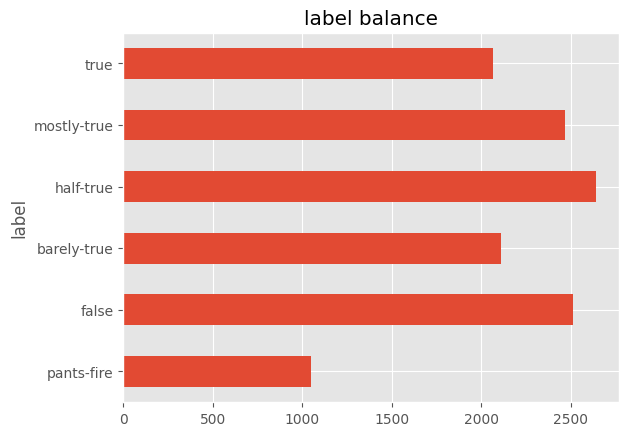

In [31]:
df["label"].value_counts() \
    .reindex(custom_order) \
    .plot(kind='barh', title="label balance")

In [32]:
df["state"].value_counts()

state
Texas             1263
Florida           1235
Wisconsin          904
New York           832
Illinois           697
                  ... 
Virginia             1
United Kingdom       1
China                1
Rhode island         1
Georgia              1
Name: count, Length: 84, dtype: int64

<Axes: title={'center': 'state balance'}, ylabel='state'>

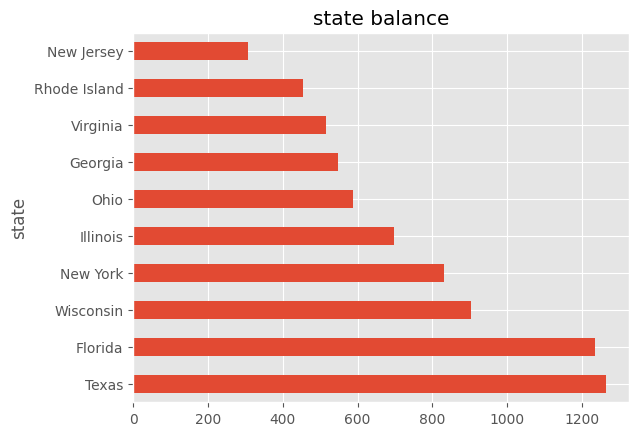

In [33]:
df["state"].value_counts() \
    .head(10) \
    .plot(kind='barh', title="state balance")

In [34]:
df["speaker"].value_counts().head(10)

speaker
barack-obama       616
donald-trump       344
hillary-clinton    297
mitt-romney        216
john-mccain        189
scott-walker       184
chain-email        178
rick-perry         173
marco-rubio        153
rick-scott         150
Name: count, dtype: int64

In [35]:
subjects = []
for _, row in tqdm(df.iterrows(), total=df.shape[0]):
    subjects += str(row["subject"]).split(",")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12836/12836 [00:00<00:00, 35344.92it/s]


In [36]:
subjects = pd.DataFrame.from_dict({"subjects": subjects})
subjects["subjects"] = subjects["subjects"].apply(lambda s: s[0] if isinstance(s, tuple) else s)

In [37]:
subjects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27795 entries, 0 to 27794
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   subjects  27795 non-null  object
dtypes: object(1)
memory usage: 217.3+ KB


In [38]:
subjects.describe()

,subjects
count,27795
unique,145
top,economy
freq,1435


In [39]:
subjects.value_counts() \
    .head(10)

subjects            
economy                 1435
health-care             1433
taxes                   1220
federal-budget           943
education                930
jobs                     902
state-budget             884
candidates-biography     808
elections                759
immigration              645
Name: count, dtype: int64

<Axes: ylabel='subjects'>

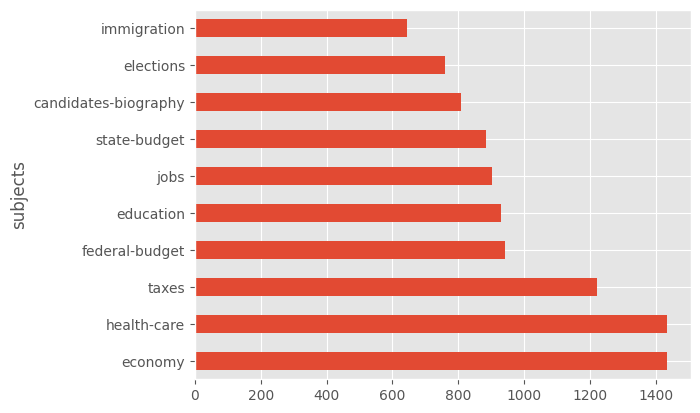

In [40]:
subjects["subjects"].value_counts() \
    .head(10) \
    .plot(kind='barh')

In [41]:
print(subjects[:5])

              subjects
0             abortion
1               energy
2              history
3  job-accomplishments
4       foreign-policy


Text(0.5, 0, 'Pants-on-fire counts')

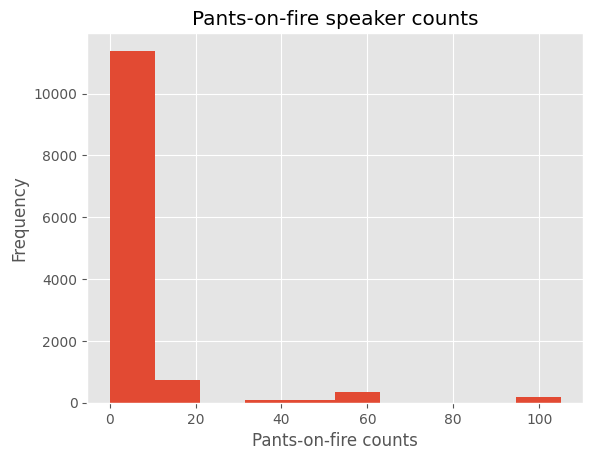

In [42]:
ax = df["pants_on_fire_counts"].plot(kind="hist", title="Pants-on-fire speaker counts")
ax.set_xlabel("Pants-on-fire counts")

Text(0.5, 0, 'False counts')

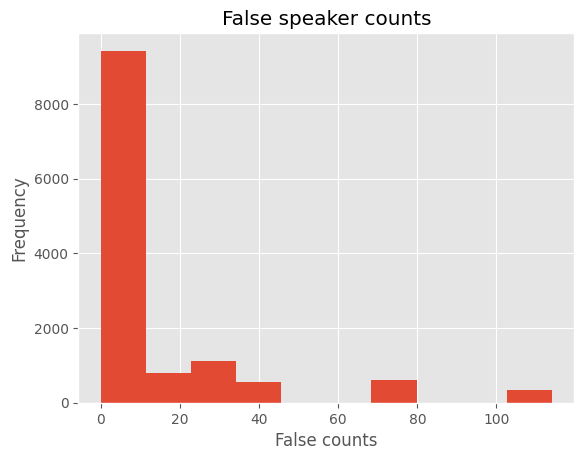

In [43]:
ax = df["false_counts"].plot(kind="hist", title="False speaker counts")
ax.set_xlabel("False counts")

Text(0.5, 0, 'Barely-true counts')

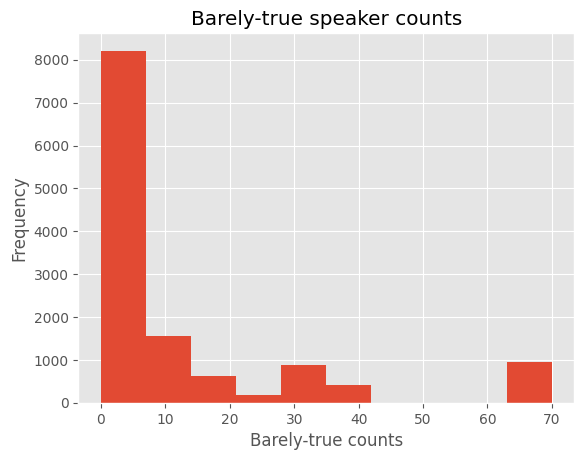

In [44]:
ax = df["barely_true_counts"].plot(kind="hist", title="Barely-true speaker counts")
ax.set_xlabel("Barely-true counts")

Text(0.5, 0, 'Half-true counts')

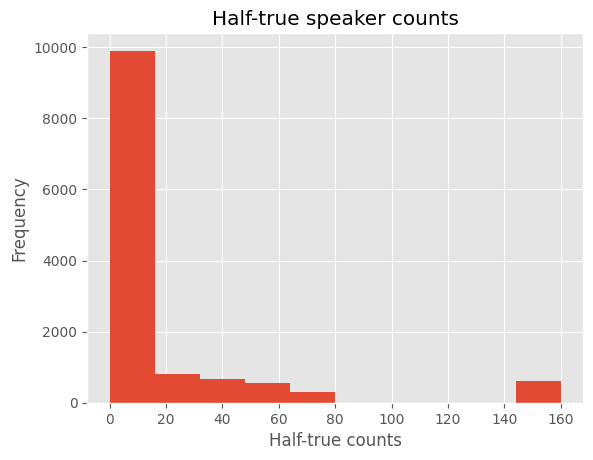

In [45]:
ax = df["half_true_counts"].plot(kind="hist", title="Half-true speaker counts")
ax.set_xlabel("Half-true counts")

Text(0.5, 0, 'Mostly-true counts')

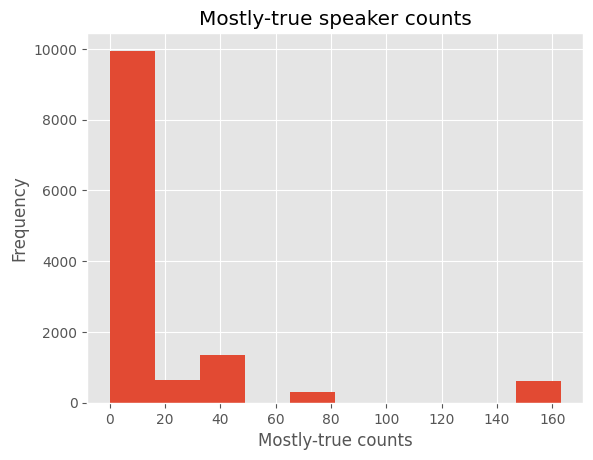

In [46]:
ax = df["mostly_true_counts"].plot(kind="hist", title="Mostly-true speaker counts")
ax.set_xlabel("Mostly-true counts")

## Check if there are any non float values in speaker counts

In [47]:
df[df["pants_on_fire_counts"].apply(lambda x: pd.isna(x) or x!=int(x))].dropna().shape[0]

0

In [48]:
df[df["false_counts"].apply(lambda x: pd.isna(x) or x!=int(x))].dropna().shape[0]

0

In [49]:
df[df["barely_true_counts"].apply(lambda x: pd.isna(x) or x!=int(x))].dropna().shape[0]

0

In [50]:
df[df["mostly_true_counts"].apply(lambda x: pd.isna(x) or x!=int(x))].dropna().shape[0]

0

In [51]:
df[df["half_true_counts"].apply(lambda x: pd.isna(x) or x!=int(x))].dropna().shape[0]

0

## Check distribution of questions

Text(0.5, 0, 'count')

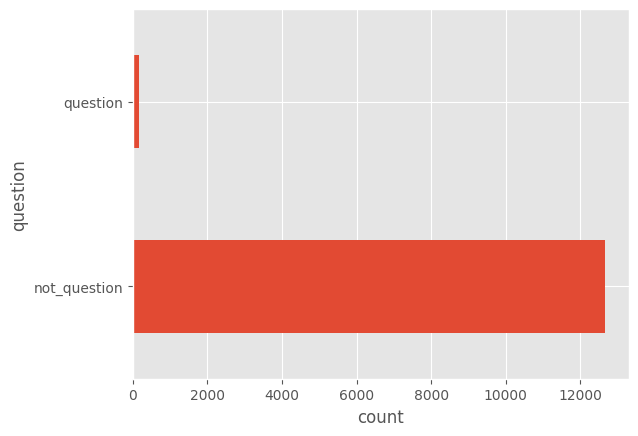

In [52]:
ax = df["question"].value_counts() \
    .plot(kind='barh')
ax.set_xlabel("count")

## Label balance in question vs not_question subsets

### 6-way classification in question subset

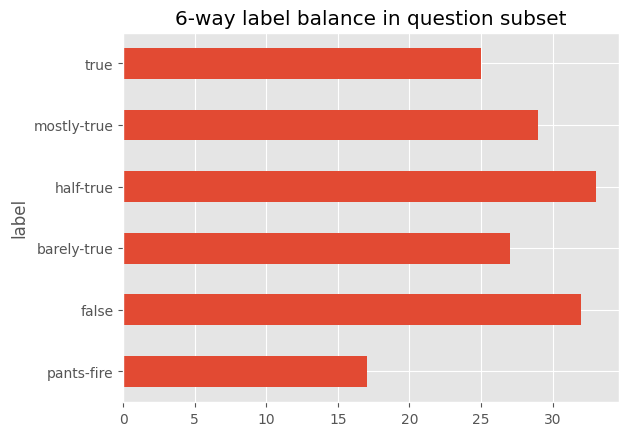

In [53]:
ax = df[df["question"] == 'question']["label"].value_counts() \
    .reindex(custom_order) \
    .plot(kind='barh', title="6-way label balance in question subset")

### 6-way classification in not_question subset

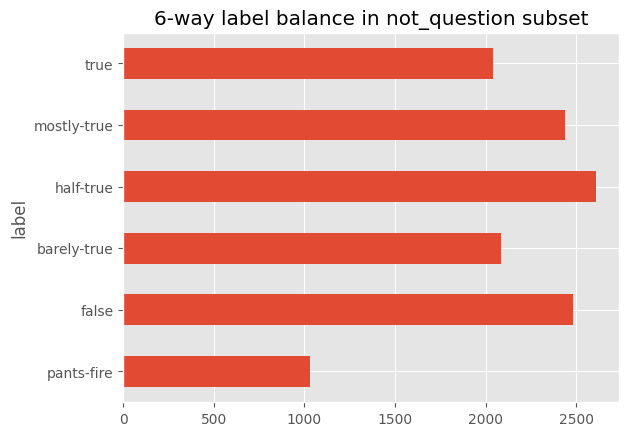

In [54]:
ax = df[df["question"] == 'not_question']["label"].value_counts() \
    .reindex(custom_order) \
    .plot(kind='barh', title="6-way label balance in not_question subset")

### 2-way classification in question subset

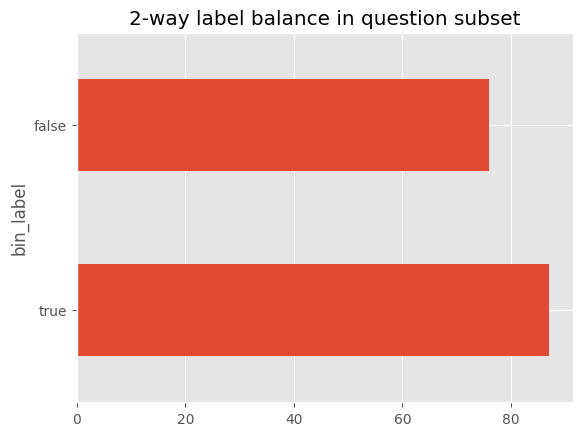

In [55]:
ax = df[df["question"] == 'question']["bin_label"].value_counts() \
    .plot(kind='barh', title="2-way label balance in question subset")

### 2-way classification in not_question subset

<Axes: title={'center': '2-way label balance in not_question subset'}, ylabel='bin_label'>

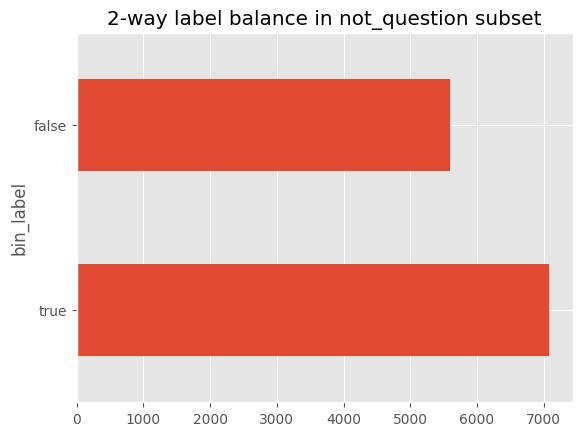

In [56]:
df[df["question"] == 'not_question']["bin_label"].value_counts() \
    .plot(kind='barh', title="2-way label balance in not_question subset")

## Sentiment distribution

<Axes: ylabel='sentiment'>

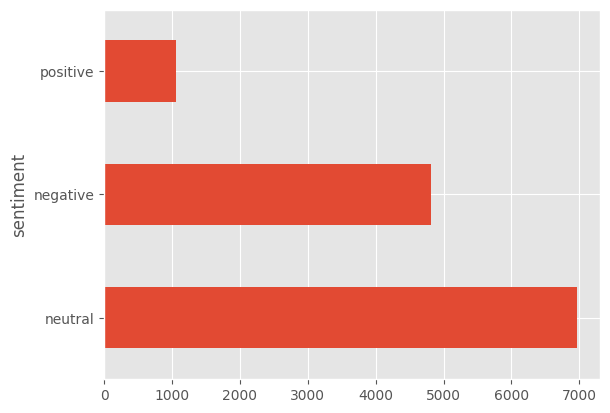

In [57]:
df['sentiment'].value_counts() \
    .plot(kind='barh')

## Check average text length per label class

In [58]:
df.groupby("label")["statement_len"].mean()

label
barely-true    108.292220
false          100.249303
half-true      111.619788
mostly-true    107.950122
pants-fire     102.964762
true           104.931168
Name: statement_len, dtype: float64

Text(0, 0.5, 'label')

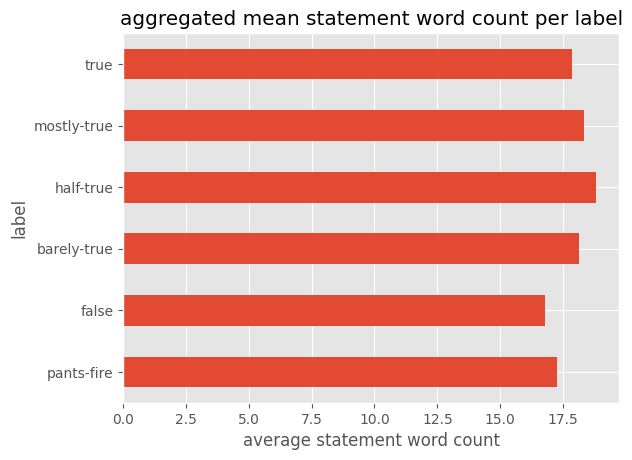

In [59]:
ax = df.groupby("label")["statement_wc"].mean() \
    .reindex(custom_order) \
    .plot(kind='barh', title="aggregated mean statement word count per label")
ax.set_xlabel("average statement word count")
ax.set_ylabel("label")

Text(0, 0.5, 'label')

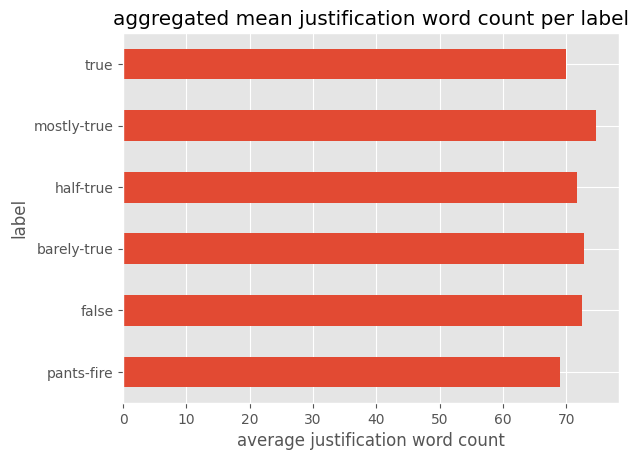

In [60]:
ax = df.groupby("label")["justification_wc"].mean() \
    .reindex(custom_order) \
    .plot(kind='barh', title="aggregated mean justification word count per label")
ax.set_xlabel("average justification word count")
ax.set_ylabel("label")

### Verify on small subset

In [61]:
o = df[df["label"] == "false"].sample(5)[["justification", "justification_wc"]]
o

,justification,justification_wc
10764,"That $90 billion, as described in a report pro...",72
2967,Hannity said that the new Republican senators ...,115
1518,"Trump said ""at least 23 countries that refuse ...",93
1958,"OReilly said, ""I never said I was on the Falkl...",138
12644,"""We have never gone a year in Virginia -- ever...",25


In [62]:
o["justification_wc"].mean()

88.6

Text(0.5, 0, 'average grammar errors')

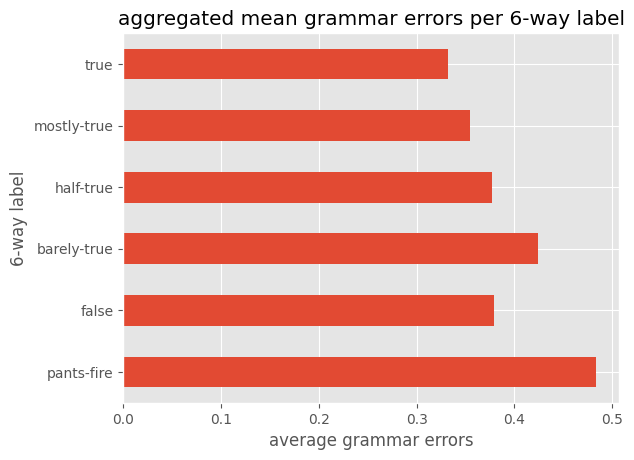

In [63]:
ax = df.groupby("label")["grammar_errors"].mean() \
    .reindex(custom_order) \
    .plot(kind='barh', title="aggregated mean grammar errors per 6-way label")
ax.set_ylabel("6-way label")
ax.set_xlabel("average grammar errors")

Text(0.5, 0, 'average grammar errors')

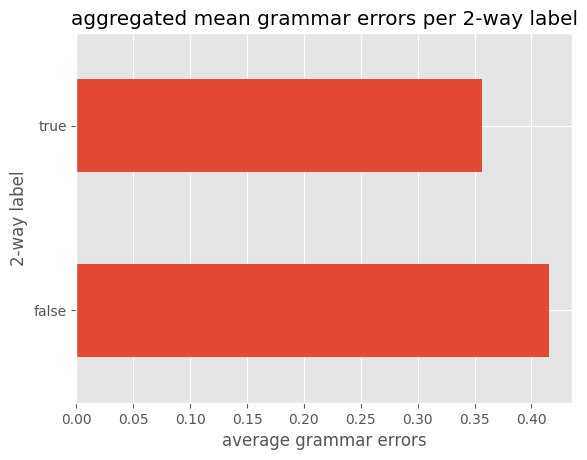

In [64]:
ax = df.groupby("bin_label")["grammar_errors"].mean() \
    .reindex(["false", "true"]) \
    .plot(kind='barh',
          title="aggregated mean grammar errors per 2-way label")
ax.set_ylabel("2-way label")
ax.set_xlabel("average grammar errors")

## State vs political affiliation counts

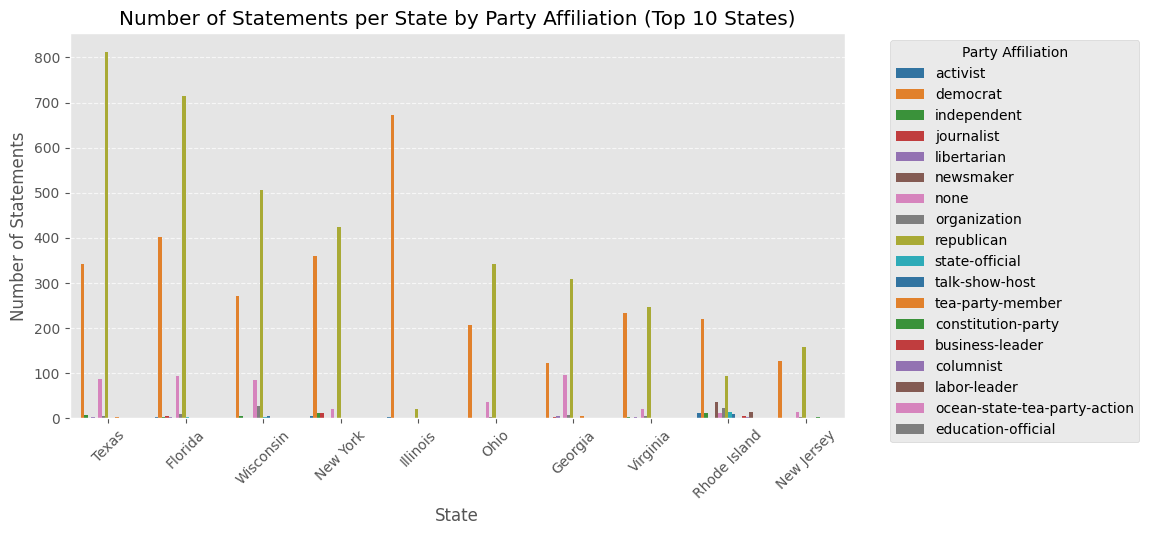

In [65]:
n = 10

# Count total messages per state and get the top n
state_counts_total = df["state"].value_counts().nlargest(n)
top_states = state_counts_total.index  # Get state names

# Filter dataset to only include top n states
filtered_df = df[df["state"].isin(top_states)]

# Count occurrences per state and party
state_counts = filtered_df.groupby(["state", "party_affiliation"]).size().reset_index(name="count")

# Enforce state order based on total count
state_counts["state"] = pd.Categorical(state_counts["state"], categories=top_states, ordered=True)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=state_counts, x="state", y="count", hue="party_affiliation", palette="tab10", order=top_states)

# Formatting
plt.xlabel("State")
plt.ylabel("Number of Statements")
plt.title(f"Number of Statements per State by Party Affiliation (Top {n} States)")
plt.legend(title="Party Affiliation", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

## Party affiliation counts

In [66]:
df['party_affiliation'].value_counts()

party_affiliation
republican                      5687
democrat                        4149
none                            2185
organization                     265
independent                      182
newsmaker                         66
libertarian                       51
journalist                        49
activist                          47
columnist                         45
talk-show-host                    32
state-official                    24
labor-leader                      15
business-leader                   11
tea-party-member                  10
education-official                 3
green                              3
constitution-party                 3
government-body                    2
county-commissioner                2
liberal-party-canada               1
Moderate                           1
democratic-farmer-labor            1
ocean-state-tea-party-action       1
Name: count, dtype: int64

<Axes: ylabel='party_affiliation'>

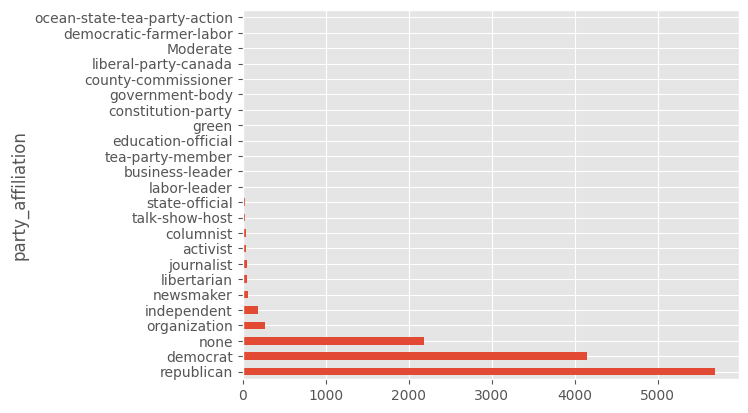

In [67]:
df['party_affiliation'].value_counts() \
    .plot(kind='barh')

# Feature Relationships

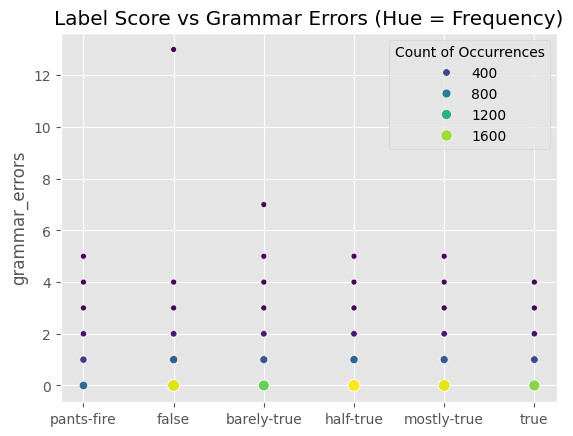

In [68]:
# Compute frequency of each grammar_errors value
df["error_count"] = df.groupby(["label", "grammar_errors"])["grammar_errors"].transform("count")

# Create scatter plot with hue as frequency count
ax = sns.scatterplot(
    x=pd.Categorical(df["label"], categories=custom_order, ordered=True),
    y="grammar_errors",
    hue="error_count",  # Hue based on frequency
    size="error_count",  # Optional: Make points bigger for frequent values
    palette="viridis",  # Change color map to highlight differences
    data=df
)

ax.set_title("Label Score vs Grammar Errors (Hue = Frequency)")
ax.legend(title="Count of Occurrences")

In [69]:
df.groupby(['label', 'grammar_errors'])["grammar_errors"].count()

label        grammar_errors
barely-true  0                 1440
             1                  494
             2                  138
             3                   25
             4                    8
             5                    2
             7                    1
false        0                 1771
             1                  572
             2                  138
             3                   24
             4                    5
             13                   1
half-true    0                 1864
             1                  600
             2                  139
             3                   25
             4                    8
             5                    2
mostly-true  0                 1784
             1                  525
             2                  127
             3                   26
             4                    2
             5                    2
pants-fire   0                  649
             1                  311


#### Ciąg dalszy...

Text(0.5, 1.0, 'maximum grammar_errors per label')

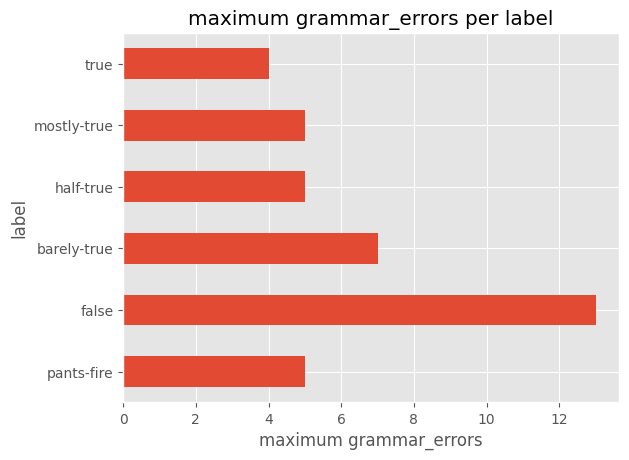

In [70]:
ax = df.groupby("label", observed=True)["grammar_errors"] \
    .max() \
    .reindex(custom_order) \
    .plot(kind="barh")

ax.set_xlabel("maximum grammar_errors")
ax.set_title("maximum grammar_errors per label")

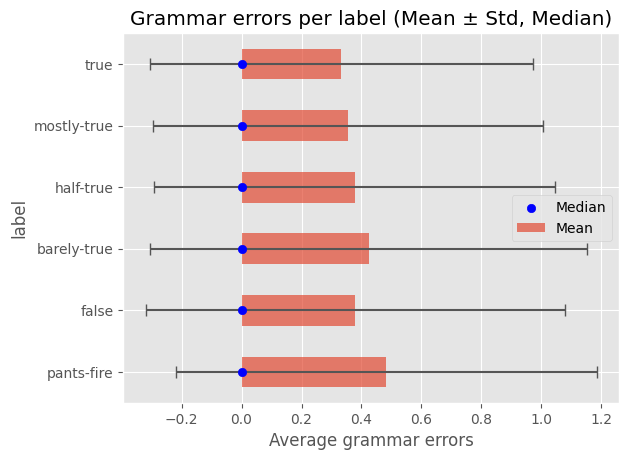

In [71]:
# Compute mean and standard deviation
grouped = df.groupby("label", observed=True)["grammar_errors"]
means = grouped.mean().reindex(custom_order)
stds = grouped.std().reindex(custom_order)  # Standard deviation (for error bars)
medians = grouped.median().reindex(custom_order)

# Plot with error bars
ax = means.plot(kind="barh", xerr=stds, capsize=4, alpha=0.7, label="Mean")

# Overlay median as scatter points
ax.scatter(medians, range(len(medians)), color="blue", label="Median", zorder=3)

ax.set_xlabel("Average grammar errors")
ax.set_title("Grammar errors per label (Mean ± Std, Median)")
ax.legend()

plt.show()

Text(0.5, 1.0, 'maximum grammar_errors per bin_label')

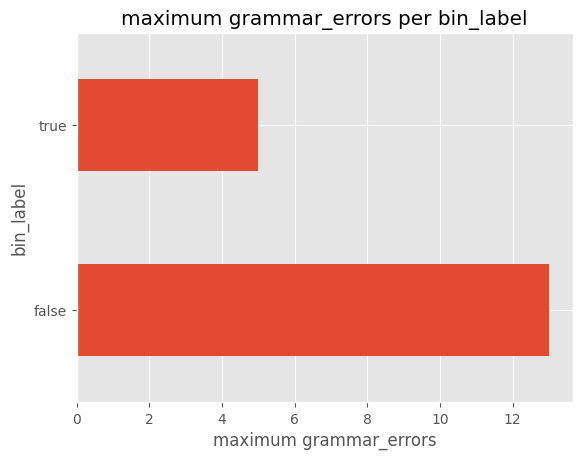

In [72]:
ax = df.groupby("bin_label", observed=True)["grammar_errors"] \
    .max() \
    .plot(kind="barh")

ax.set_xlabel("maximum grammar_errors")
ax.set_title("maximum grammar_errors per bin_label")

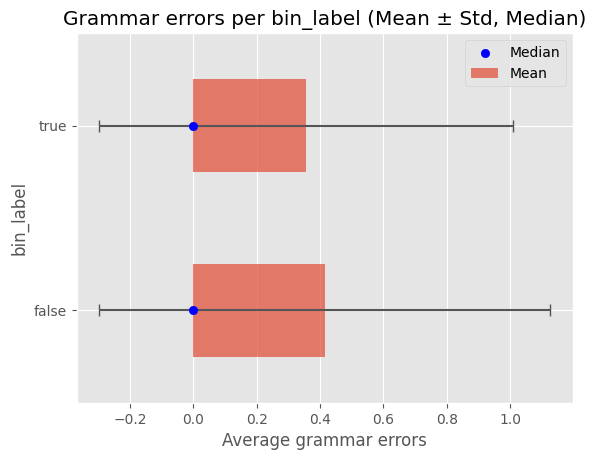

In [73]:
# Compute mean and standard deviation
grouped = df.groupby("bin_label", observed=True)["grammar_errors"]
means = grouped.mean()
stds = grouped.std()  # Standard deviation (for error bars)
medians = grouped.median()

# Plot with error bars
ax = means.plot(kind="barh", xerr=stds, capsize=4, alpha=0.7, label="Mean")

# Overlay median as scatter points
ax.scatter(medians, range(len(medians)), color="blue", label="Median", zorder=3)

ax.set_xlabel("Average grammar errors")
ax.set_title("Grammar errors per bin_label (Mean ± Std, Median)")
ax.legend()

plt.show()

Text(0.5, 1.0, 'statement length vs grammar errors vs label score')

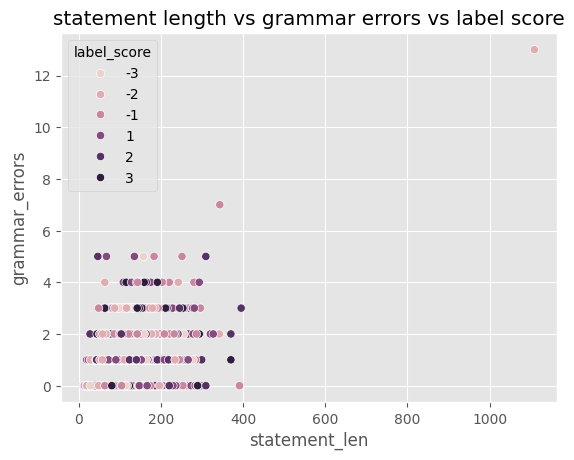

In [74]:
ax = sns.scatterplot(x='statement_len',
                y='grammar_errors',
                hue='label_score',
                data=df)
ax.set_title("statement length vs grammar errors vs label score")

<Axes: title={'center': 'label score vs barely true counts'}, xlabel='label', ylabel='barely_true_counts'>

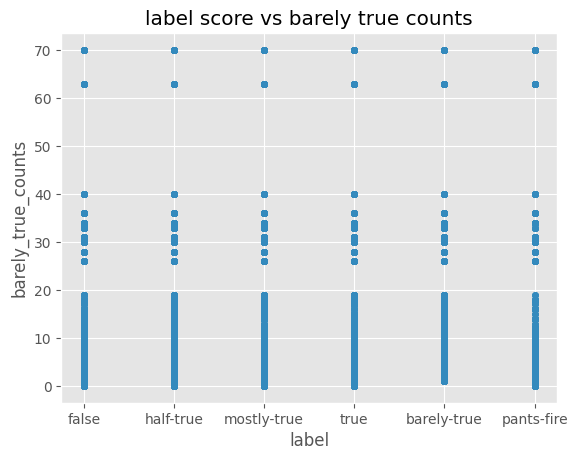

In [75]:
df.plot(kind='scatter',
        x='label',
        y='barely_true_counts',
        title='label score vs barely true counts')
# tego typu wykresów nie wrzucać do pracy inżynierskiej

Text(0.5, 1.0, 'grammar errors vs punctuations vs label score')

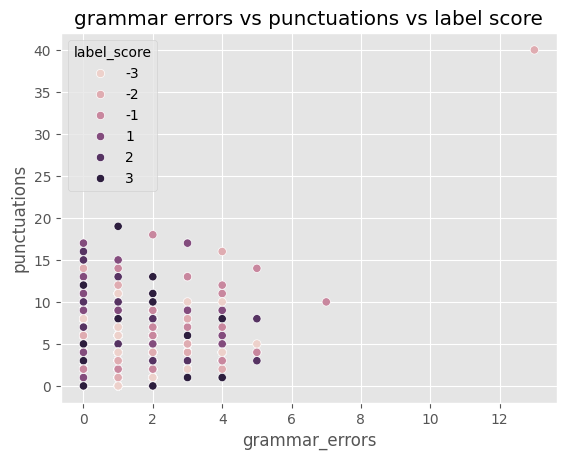

In [76]:
ax = sns.scatterplot(x='grammar_errors',
                     y='punctuations',
                     hue='label_score',
                     data=df)
ax.set_title("grammar errors vs punctuations vs label score")

Text(0.5, 1.0, 'maximum punctuations per label')

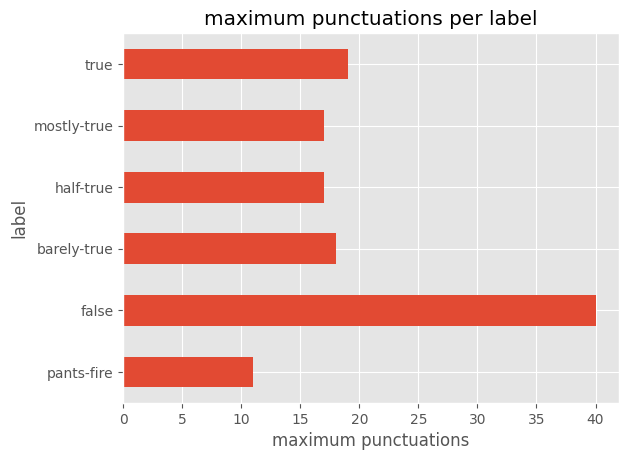

In [77]:
ax = df.groupby("label", observed=True)["punctuations"] \
    .max() \
    .reindex(custom_order) \
    .plot(kind="barh")

ax.set_xlabel("maximum punctuations")
ax.set_title("maximum punctuations per label")

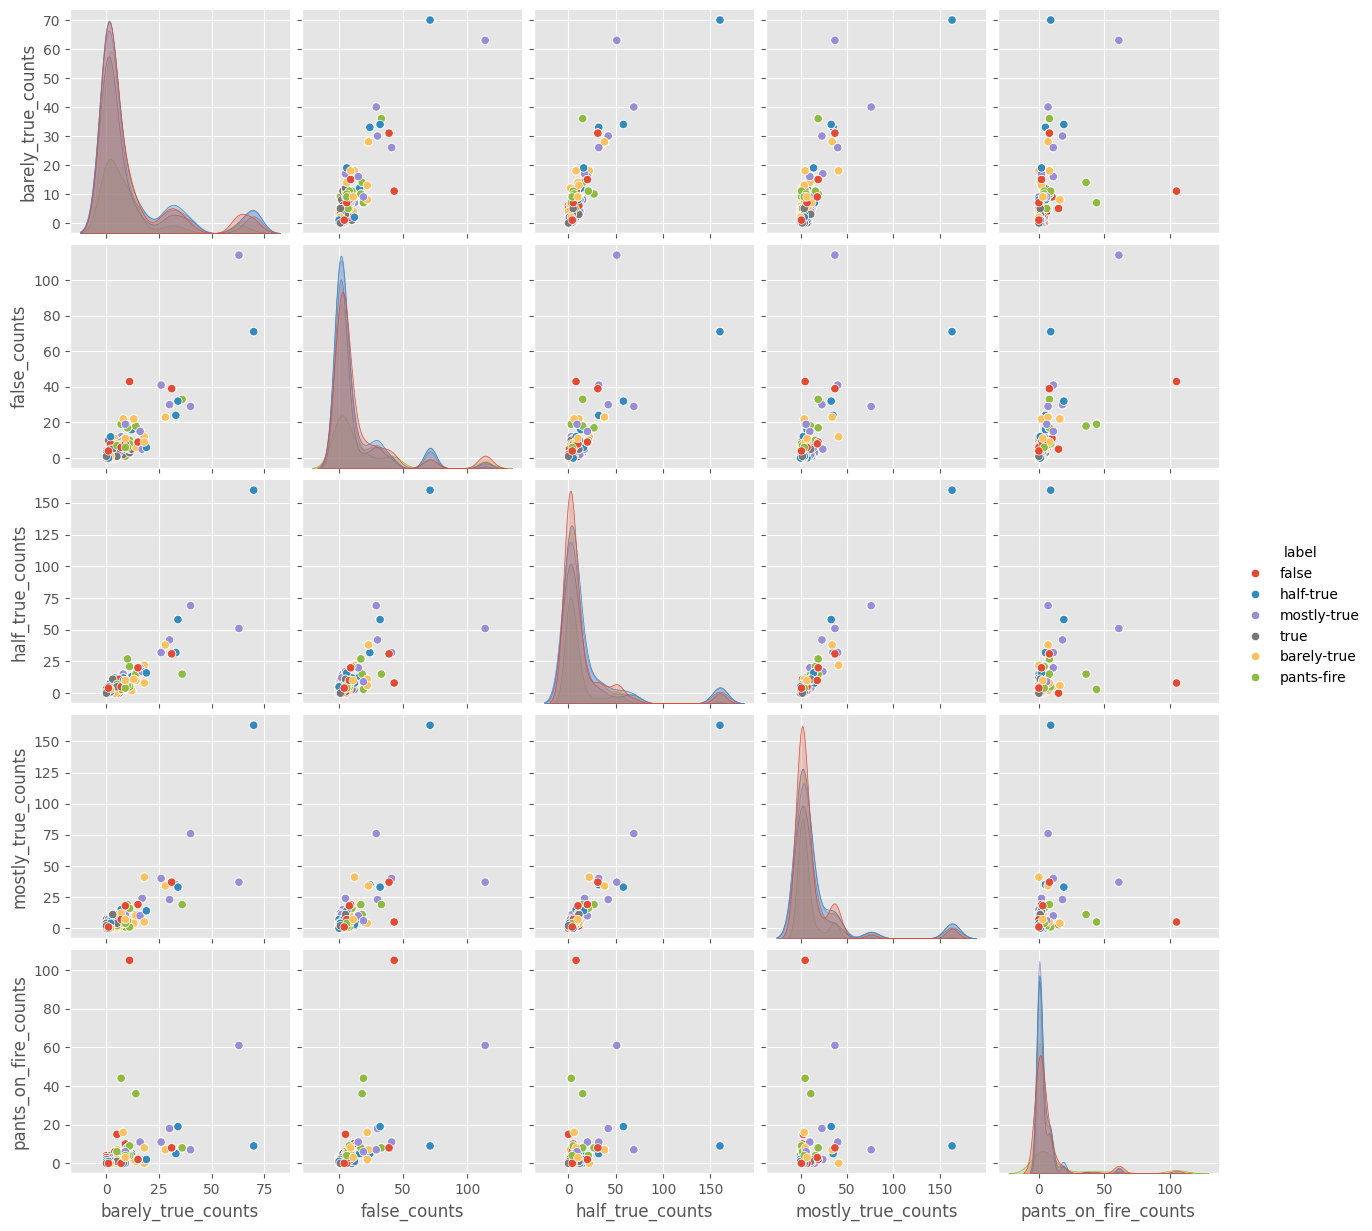

In [84]:
sns.pairplot(df,
             vars=[
                 'barely_true_counts',
                 'false_counts',
                 'half_true_counts',
                 'mostly_true_counts',
                 'pants_on_fire_counts'
             ],
             hue='label')
plt.show()

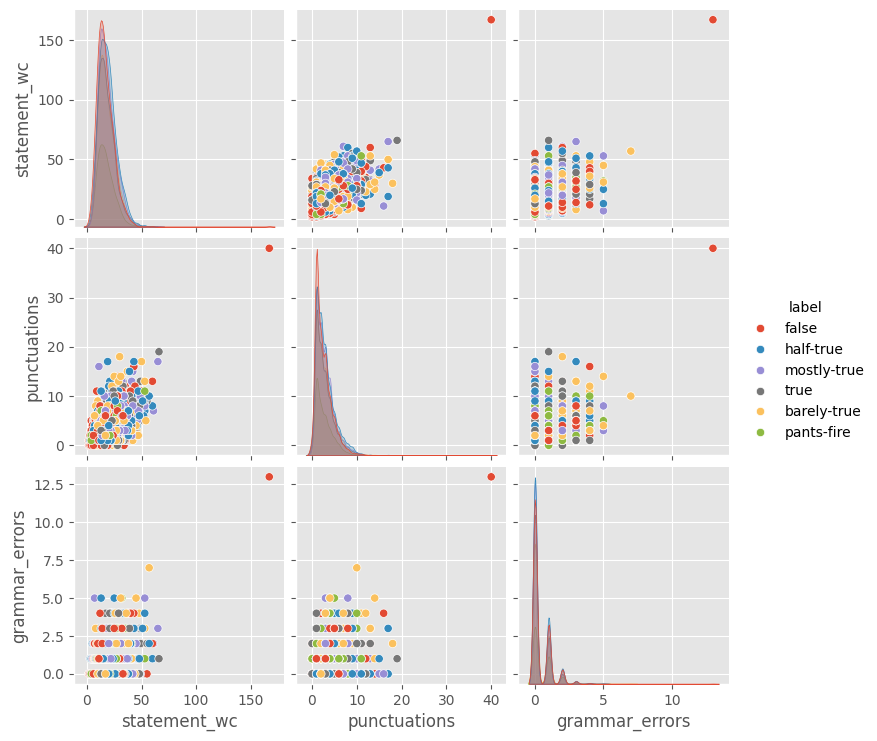

In [83]:
sns.pairplot(df,
             vars=[
                 'statement_wc',
                 'punctuations',
                 'grammar_errors'
             ],
             hue='label')
plt.show()

In [80]:
df.groupby(["label", "sentiment"]).size()

label        sentiment
barely-true  negative      838
             neutral      1123
             positive      147
false        negative      922
             neutral      1431
             positive      158
half-true    negative     1000
             neutral      1368
             positive      270
mostly-true  negative      893
             neutral      1330
             positive      243
pants-fire   negative      442
             neutral       563
             positive       45
true         negative      725
             neutral      1143
             positive      195
dtype: int64

In [81]:
df.groupby(["label", "sentiment"]).size().unstack()

sentiment,negative,neutral,positive
label,,,
barely-true,838,1123,147
false,922,1431,158
half-true,1000,1368,270
mostly-true,893,1330,243
pants-fire,442,563,45
true,725,1143,195


Text(0.5, 1.0, 'label vs sentiment')

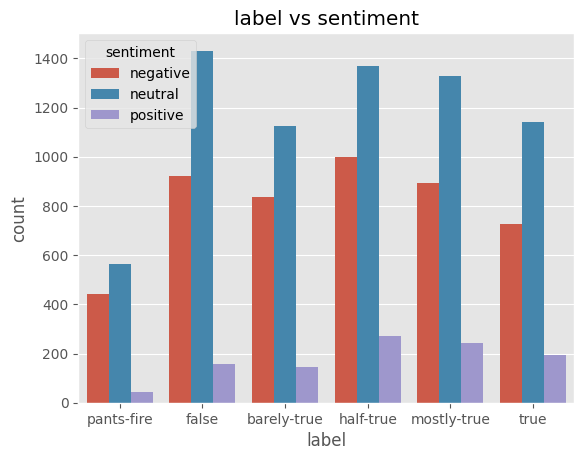

In [82]:
ax = sns.countplot(data=df, x="label", hue="sentiment", order=custom_order)
ax.set_title("label vs sentiment")